In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-ship/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

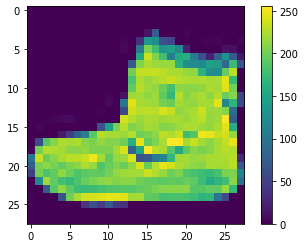

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#normalizacja danych
train_images = train_images/255.0
test_images = test_images/255.0

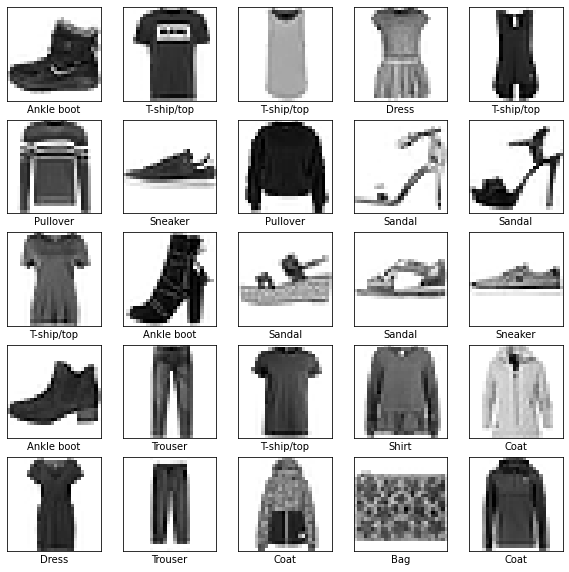

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#budowa modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
#kompilacja modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5025 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [19]:
#ocena dokładności modelu
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.3538 - accuracy: 0.8760 - 614ms/epoch - 2ms/step
Test accuracy: 0.8759999871253967


In [20]:
#Prognoza
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [22]:
predictions[0]

array([7.8813692e-08, 1.5452808e-09, 4.5571248e-08, 5.6182223e-09,
 1.3647003e-08, 2.6117038e-04, 1.9984134e-07, 3.6072996e-02,
 2.3362871e-08, 9.6366543e-01], dtype=float32)

In [23]:
test_labels[0]

9

In [24]:
np.argmax(predictions[0])

9

In [25]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
               

In [26]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array,color='#777777') 
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

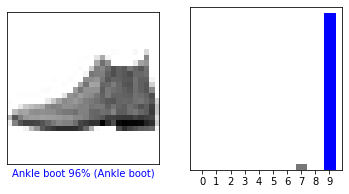

In [27]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

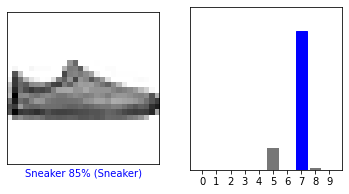

In [28]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

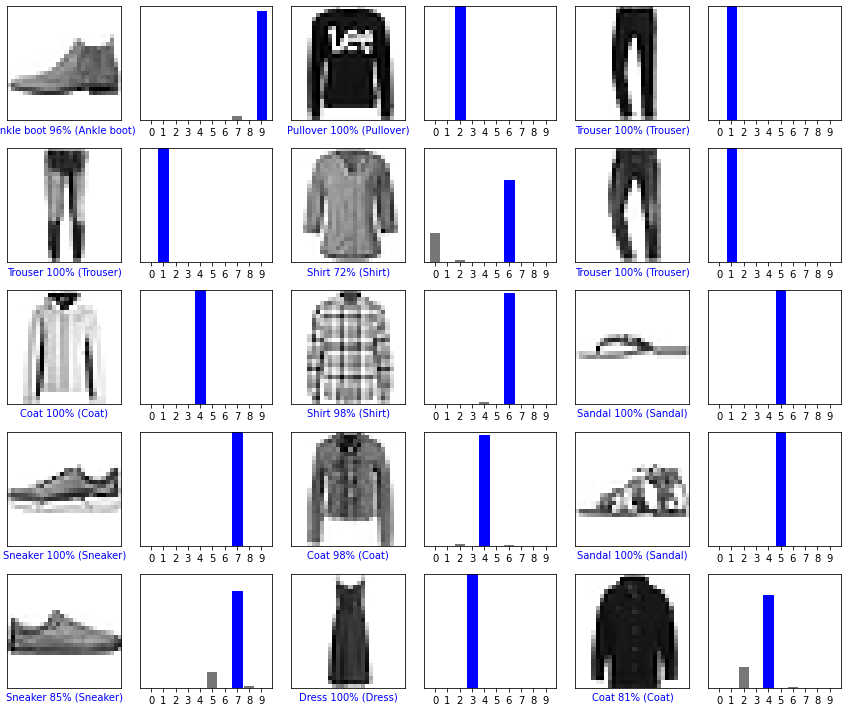

In [30]:
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [31]:
#użycie wyszkolonego modelu
img = test_images[1]
print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [33]:
prediction_single = probability_model.predict(img)
print(prediction_single)

1/1 [==============================] - 0s 23ms/step
[[2.7469430e-05 1.8575805e-15 9.9968803e-01 1.5170978e-10 2.5335158e-04
  1.0926237e-15 3.1195799e-05 3.1211154e-18 7.1401578e-12 2.4109183e-11]]


In [34]:
np.argmax(prediction_single[0])

2